# PROCESS SUBMISSIONS CSV
The purpose of this script is to get metrics on all submissions and the subset of chosen submissions. This subset will be used for further analysis of submitted films. All data is extracted from local flat files.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt

In [2]:
subs_df = pd.read_csv("data/filmfreeway-submissions.csv")

In [3]:
subs_df.info()
print(f'{subs_df.shape[0]} rows & {subs_df.shape[1]} columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project Title          103 non-null    object 
 1   Duration               103 non-null    object 
 2   Genres                 40 non-null     object 
 3   First Name             103 non-null    object 
 4   Last Name              103 non-null    object 
 5   Email                  103 non-null    object 
 6   City                   67 non-null     object 
 7   State                  65 non-null     object 
 8   Country                67 non-null     object 
 9   Submission Date        103 non-null    object 
 10  Submission Status      103 non-null    object 
 11  Submission Categories  103 non-null    object 
 12  Rating                 0 non-null      float64
 13  Submission ID          103 non-null    int64  
 14  Birthdate              83 non-null     object 
 15  Gender

In [4]:
subs_df.isnull().sum()

Project Title              0
Duration                   0
Genres                    63
First Name                 0
Last Name                  0
Email                      0
City                      36
State                     38
Country                   36
Submission Date            0
Submission Status          0
Submission Categories      0
Rating                   103
Submission ID              0
Birthdate                 20
Gender                    13
Judging Status             0
Submission Link            0
Directors                  2
Writers                   18
Producers                 20
dtype: int64

In [5]:
print(set(x for x in subs_df['Submission Status']))

{'Withdrawn', 'In Consideration', 'Incomplete'}


## CLEAN DATA
Note: Should "Incomlete" entries be dropped?

In [6]:
# Drop withdrawn entries
subs_df = subs_df[subs_df['Submission Status'] != 'Withdrawn']

In [7]:
# Replace column to shorten: Feel Good Shorts
subs_df['Submission Categories'] = subs_df['Submission Categories'].apply( \
        lambda x: x.replace('Short films that make you feel good.', 'Feel Good Shorts'))

In [8]:
# 'Youth Short Films, Short Documentary' force to 'Short Documentary'
subs_df['Submission Categories'] = subs_df['Submission Categories'].apply( \
        lambda x: x.replace('Youth Short Films, Short Documentary', 'Short Documentary'))

In [9]:
# drop rating, genres cols due to all missing data
subs_df.drop(columns=['Rating', 'Genres'], inplace=True)

In [10]:
# fill na with empty str to allow apply method
subs_df['State'].fillna('', inplace=True)

In [11]:
# replace to unify state names
subs_df['State'] = subs_df['State'].apply(
    lambda x: x.replace('maryland', 'MD')
               .replace('Maryland', 'MD')
               .replace('Virginia', 'VA')
               .replace('Georgia', 'GA')
               .replace('Pennsylvania', 'PA')
               .replace('Florida', 'FL')
               .replace('New York', 'NY')
               .replace('ny', 'NY')
)

## Subset Selected Entries

In [12]:
selected_df = subs_df[subs_df['Judging Status']=='Selected']
print(f'Acceptance Rate: {len(selected_df) / len(subs_df)}, ({len(selected_df)} / {len(subs_df)})')

Acceptance Rate: 0.72, (72 / 100)


## EDA

In [13]:
selected_df.columns

Index(['Project Title', 'Duration', 'First Name', 'Last Name', 'Email', 'City',
       'State', 'Country', 'Submission Date', 'Submission Status',
       'Submission Categories', 'Submission ID', 'Birthdate', 'Gender',
       'Judging Status', 'Submission Link', 'Directors', 'Writers',
       'Producers'],
      dtype='object')

In [14]:
selected_gender_count = Counter(selected_df.Gender)
print(f'Gender Count: {selected_gender_count}', '\n')

Gender Count: Counter({'Male': 41, 'Female': 21, nan: 9, 'Other': 1}) 



In [15]:
state_count = Counter(selected_df.State)
us_state_count = [state for state in state_count.items() if len(state[0]) == 2]
international_count = [state for state in state_count.items() if len(state[0]) != 2 and state[0] != '']
unknown_loc_count = [state for state in state_count.items() if state[0] == '']
print('US COUNT:')
print(us_state_count)
print('\nINTERNATIONAL COUNT')
print(international_count)
print('\nUNKNOWN COUNT')
print(unknown_loc_count)

US COUNT:
[('MD', 14), ('CA', 2), ('GA', 1), ('DE', 1), ('PA', 3), ('NY', 2), ('DC', 1), ('FL', 2), ('NJ', 1), ('VA', 4), ('HI', 1), ('IL', 1), ('TX', 1), ('NC', 1), ('MA', 1), ('OH', 1)]

INTERNATIONAL COUNT
[('Cornwall and Isles of Scilly', 1), ('Binh Thuan', 1), ('Málaga', 1), ('Ontario', 1), ('London', 1), ('kurdestan', 1), ('fars', 1), ('Rio Grande do Sul', 1), ('Maharashtra', 1), ('Buenos Aires', 1)]

UNKNOWN COUNT
[('', 25)]


In [16]:
def make_bar(y_pos, n, labels, xlabel, filename):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        _ = ax.barh(y_pos, n, align='center')
        _ = ax.set_yticks(y_pos)
        _ = ax.set_yticklabels(labels)
        _ = ax.invert_yaxis()
        _ = ax.set_xlabel(str(xlabel))
        _ = ax.set_title(str(filename))
        _ = plt.tight_layout()
        # plt.savefig(DATA_FOLDER / f'{filename}.png')
        plt.show()

In [17]:
def make_pie(ratios, labels, filename):
        fig1, ax = plt.subplots()
        _ = ax.pie(ratios, labels=labels, autopct='%1.1f%%', shadow=False, normalize=True)
        _ = ax.set_title(str(filename))
        _ = ax.axis('equal') # make sure pie is circle
        # plt.savefig(DATA_FOLDER / '{filename}.png', bbox_inches='tight')
        plt.show()

### PLOT ALL SUBMISSIONS PER CATEGORY

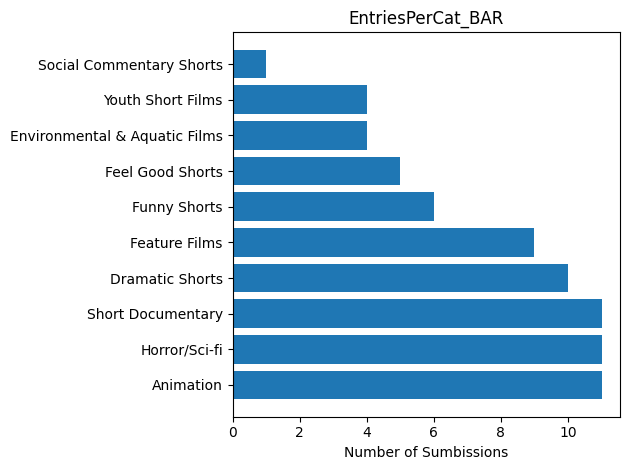

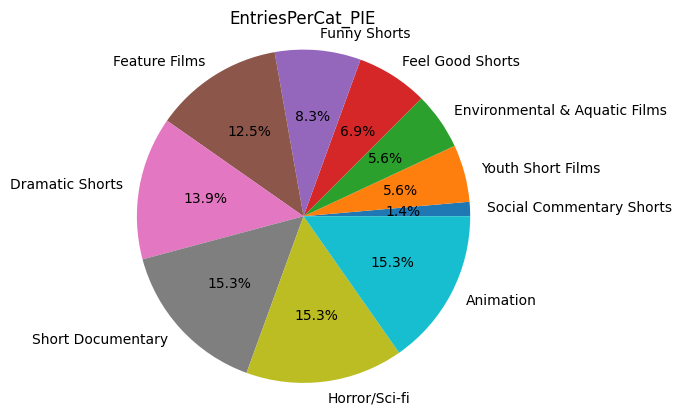

In [18]:
subs_per_cat = dict(Counter(selected_df['Submission Categories']))
sorted_cat = sorted(subs_per_cat.items(), key=lambda x: x[1])
total_selected = len(selected_df['Project Title'])
labels = [k for k, v in sorted_cat]
number_of_entries = [v for k, v in sorted_cat]
ratios = [(v / total_selected) for k, v in sorted_cat]

make_bar(
        y_pos=np.arange(len(labels)), n=number_of_entries,
        labels=labels, xlabel='Number of Sumbissions', filename='EntriesPerCat_BAR'
         )

make_pie(
        ratios=ratios, labels=labels, filename='EntriesPerCat_PIE'
        )

### DURATION METRICS

In [27]:
# Convert Duration column to timedelta datatype
selected_df.Duration = pd.to_timedelta(selected_df.Duration)

AttributeError: 'Timedelta' object has no attribute 'minutes'

In [45]:
selected_duration

{1: 17.0,
 2: 0.0,
 3: 82.0,
 6: 9.0,
 7: 12.0,
 8: 4.0,
 9: 11.0,
 10: 15.0,
 11: 9.0,
 12: 25.0,
 14: 17.0,
 17: 6.0,
 19: 3.0,
 20: 13.0,
 21: 9.0,
 23: 20.0,
 26: 13.0,
 28: 9.0,
 29: 9.0,
 30: 2.0,
 32: 14.0,
 33: 6.0,
 36: 2.0,
 39: 12.0,
 40: 0.0,
 41: 13.0,
 42: 14.0,
 44: 13.0,
 46: 3.0,
 47: 8.0,
 48: 3.0,
 49: 45.0,
 50: 80.0,
 51: 23.0,
 52: 17.0,
 54: 9.0,
 56: 19.0,
 57: 3.0,
 58: 6.0,
 59: 14.0,
 60: 6.0,
 61: 18.0,
 62: 4.0,
 63: 85.0,
 64: 3.0,
 65: 9.0,
 67: 15.0,
 69: 7.0,
 70: 9.0,
 71: 6.0,
 73: 7.0,
 75: 19.0,
 77: 5.0,
 78: 12.0,
 79: 38.0,
 80: 11.0,
 83: 75.0,
 84: 2.0,
 85: 5.0,
 86: 11.0,
 87: 27.0,
 88: 6.0,
 89: 10.0,
 91: 4.0,
 93: 9.0,
 95: 80.0,
 96: 25.0,
 97: 11.0,
 98: 24.0,
 99: 13.0,
 101: 15.0,
 102: 51.0,
 'Total Minutes': 1      17.0
 2       0.0
 3      82.0
 6       9.0
 7      12.0
        ... 
 97     11.0
 98     24.0
 99     13.0
 101    15.0
 102    51.0
 Name: Duration, Length: 72, dtype: float64}

In [20]:
# Get Duration sum per category
total_duation = selected_df.Duration.sum()
print(f'Total Duration of Films Selected: {total_duation}')

Total Duration of Films Selected: 0 days 20:38:31


In [44]:
selected_duration['Total Minutes'] = selected_df.groupby(by='Submission Categories')['Duration'].apply(
        lambda x: x.astype('timedelta64[m]')
        )

In [22]:
mean_duration = {}
for pair, v in selected_duration.items():
    cat, stat = pair
    if stat == 'mean':
        hours, remainder = divmod(v, 3600)
        minutes, seconds = divmod(remainder, 60)
        mean_duration[cat] = '{:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds))

print(mean_duration)

{'Animation': '00:04:35', 'Dramatic Shorts': '00:12:17', 'Environmental & Aquatic Films': '00:07:38', 'Feature Films': '01:02:27', 'Feel Good Shorts': '00:11:00', 'Funny Shorts': '00:11:54', 'Horror/Sci-fi': '00:11:02', 'Short Documentary': '00:17:15', 'Social Commentary Shorts': '00:09:32', 'Youth Short Films': '00:06:16'}


In [23]:
selected_df

,Project Title,Duration,First Name,Last Name,Email,City,State,Country,Submission Date,Submission Status,Submission Categories,Submission ID,Birthdate,Gender,Judging Status,Submission Link,Directors,Writers,Producers
1,Boathouse,0 days 00:17:45,Charlie,Knott,cknott@mica.edu,Baltimore,MD,United States,2020-05-01,In Consideration,Dramatic Shorts,15469750,1996-08-14,Male,Selected,https://filmfreeway.com/submissions/15469750,Charlie Knott,Charlie Knott,Sarah Achenbach
2,Seagulls,0 days 00:00:00,Trevor,Taylor,tajt08@gmail.com,NaN,,NaN,2020-05-01,In Consideration,Dramatic Shorts,15470047,1996-03-08,Male,Selected,https://vimeo.com/408284871/34b2805db0,Trevor Taylor,Trevor Taylor,NaN
3,Re-Elected,0 days 01:22:00,Max,Radbill,maxtheradbill@gmail.com,South Pasadena,CA,United States,2020-05-02,In Consideration,Feature Films,15473657,1993-09-28,Male,Selected,https://youtu.be/0qpgvk-cDhw,Max Radbill,"Max Radbill, Eric Looney","Max Radbill, Eric Looney"
6,The Old Bargain,0 days 00:09:59,Matthew,Schwartz,mhs426@yahoo.com,Marietta,GA,United States,2020-05-04,In Consideration,Youth Short Films,15491480,NaN,Male,Selected,https://filmfreeway.com/submissions/15491480,David A. Schwartz,Matt Schwartz,"Matt Schwartz, Brandon Thaxton"
7,Loss,0 days 00:12:03,Melisa,Yates,melissaymedia@gmail.com,Newark,DE,United States,2020-05-05,In Consideration,Short Documentary,15501041,1998-02-22,Female,Selected,https://filmfreeway.com/submissions/15501041,Melissa Yates,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Love Blood Pain,0 days 00:11:09,Magnum,Borini,amorsanguedor@gmail.com,Porto Alegre,Rio Grande do Sul,Brazil,2020-11-30,In Consideration,Horror/Sci-fi,17175971,1985-11-30,Other,Selected,https://filmfreeway.com/submissions/17175971,Magnum Borini,Magnum Borini,"Cláudia Borba, Magnum Borini"
98,The Other,0 days 00:24:42,Ravinder,Dhaka,ravidhaka44@gmail.com,Mumbai,Maharashtra,India,2020-11-30,In Consideration,Feature Films,17176063,1990-05-02,Male,Selected,https://filmfreeway.com/submissions/17176063,"Ako Zandkarimi\t, Saman Hosseinpour","Ako Zandkarimi\t, Saman Hosseinpour","Ravinder Dhaka, Dimen Zandi, Saman Hosseinpour..."
99,The Little Beach,0 days 00:13:00,Sonia,Bertotti,sonia.bertotti@gmail.com,C.A.B.A,Buenos Aires,Argentina,2020-11-30,In Consideration,Dramatic Shorts,17176212,1984-09-09,Female,Selected,https://www.youtube.com/watch?v=J6TNMLi_sHA&t=3s,Sonia,Alejandro,"Alejandro, Micaela"
101,In-Between Full Series,0 days 00:15:00,In,Betwen,couldbedoingbetter@gmail.com,NaN,,NaN,2020-12-06,In Consideration,Funny Shorts,17219330,1992-05-14,Female,Selected,https://filmfreeway.com/submissions/17219330,"Kathleen Poliski, Melanie Carmichael","Kathleen Poliski, Melanie Carmichael",NaN
